In [1]:
import numpy as np
import math, os, sys
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
dataset = np.load('dataset/all_data-preprocessed.npz')
features, labels = dataset['features'].astype('float32'), dataset['labels'].astype('float32')
train_test_split_factor = .8
validation_split_factor = .2
train_x, train_y, test_x, test_y = features[:math.floor(len(features)*train_test_split_factor)], labels[:math.floor(len(labels)*train_test_split_factor)], features[math.floor(len(features)*train_test_split_factor):], labels[math.floor(len(labels)*train_test_split_factor):]
train_x, test_x = np.expand_dims(train_x, axis=-1), np.expand_dims(test_x, axis=-1) # for use with TimeDistributed
input_shape = train_x.shape
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(288, 1, 7, 1) (288, 7) (72, 1, 7, 1) (72, 7)


In [3]:
train_x = train_x.reshape(train_x.shape[0], 7).astype('float32')
test_x = test_x.reshape(test_x.shape[0], 7).astype('float32')
print(train_x.shape, test_x.shape)

(288, 7) (72, 7)


In [4]:
model = RandomForestRegressor(n_estimators=200 ,max_depth=10,random_state=0)
model.fit(train_x, train_y)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=0)

In [5]:
pred = model.predict(test_x[:64])

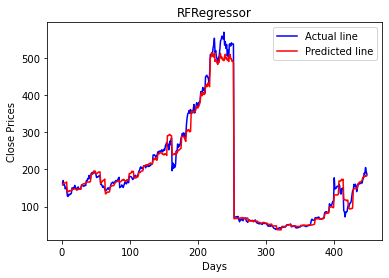

In [6]:
close_pred = np.reshape(pred, (-1, 1))
test_y_reshape = np.reshape(test_y[:64], (-1, 1))
days = np.arange(1, len(test_y_reshape)+1)
plt.plot(days, test_y_reshape, 'b', label='Actual line')
plt.plot(days, close_pred, 'r', label='Predicted line')
plt.title('RFRegressor')
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error  as MSE

In [8]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('RMSE: {:0.4f}' .format(math.sqrt(MSE(test_y[:64], pred))))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [9]:
accuracy = evaluate(model, test_x, test_y)

Model Performance
Average Error: 12.4984 degrees.
RMSE: 15.9964
Accuracy = 93.60%.


In [10]:
# save model
import joblib
joblib.dump(model, 'weights/rf.sav')

['weights/rf.sav']